Doc link : https://docs.monai.io/en/0.1.0/transforms.html

In [1]:
import os
import matplotlib.pyplot as plt
import nibabel as nib

from dltk.io.augmentation import *

from monai.transforms.spatial.functional import flip
from monai.transforms import AdjustContrast, Affine, RandBiasField, Flip, Rotate90, Orientation, ShiftIntensity, Rand3DElastic

2023-12-22 21:16:54.596508: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-22 21:16:54.978568: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-22 21:16:55.134300: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-22 21:16:55.952026: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

In [2]:
directory = "./lib/AD"
file_path = os.listdir(directory)[0]
img = nib.load(os.path.join(directory,file_path)).get_fdata()

def show_2D(irm, slice, axe):
    if axe == "x":
#         plt.imshow(irm[slice,:,:], cmap="gray", vmin=0, vmax=600)
        plt.imshow(irm[slice,:,:], cmap="gray")

    elif axe == "y":
#         plt.imshow(irm[:,slice,:], cmap="gray", vmin=0, vmax=600)
        plt.imshow(irm[:,slice,:], cmap="gray")

    elif axe == "z":
#         plt.imshow(irm[:,:,slice], cmap="gray", vmin=0, vmax=600)
        plt.imshow(irm[:,:,slice], cmap="gray")

    plt.title("Slice number : " + str(slice) + " on axe " + axe)
    plt.colorbar()
    plt.show()

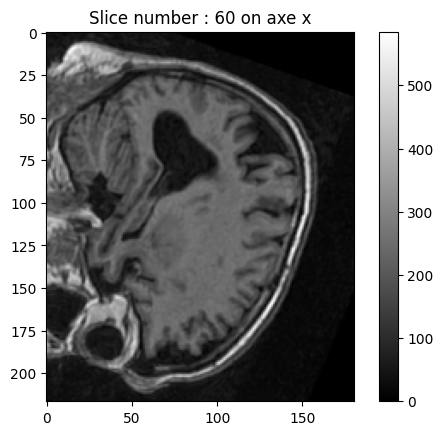

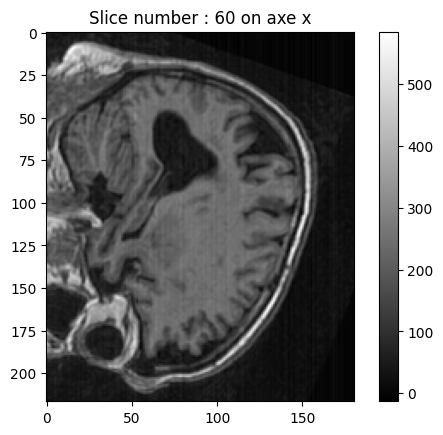

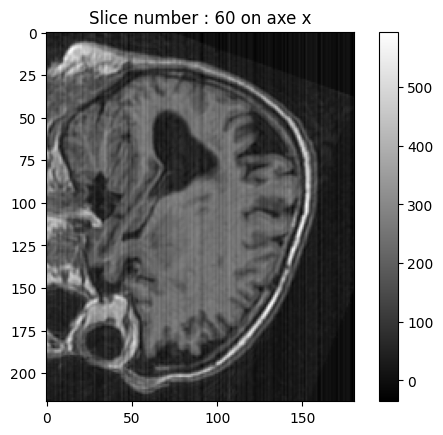

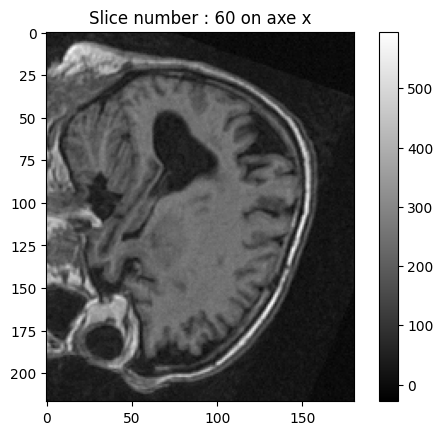

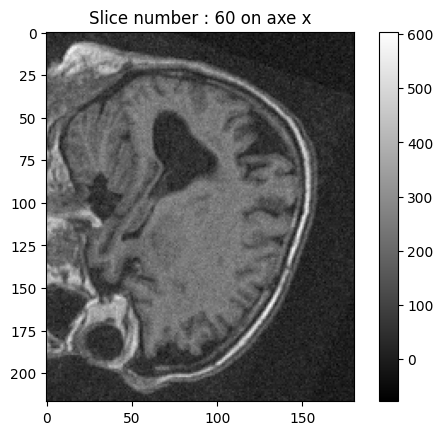

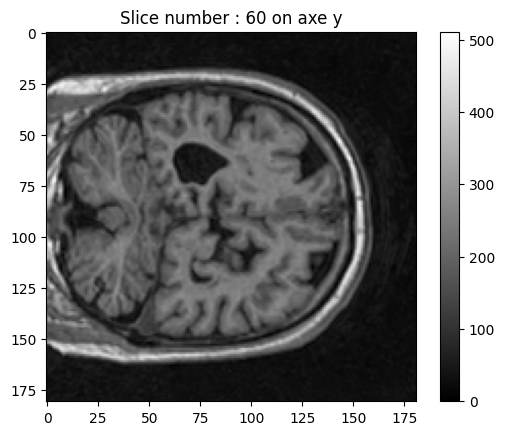

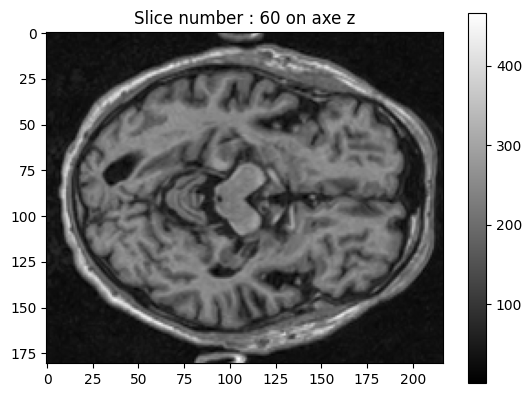

In [3]:
# Add a Gaussian offset (independently for each channel)
t1_offset = add_gaussian_offset(img.copy(), sigma=5)
t1_offset2 = add_gaussian_offset(img.copy(), sigma=15)

# Add Gaussian noise
t1_noise = add_gaussian_noise(img.copy(), sigma=7)
t1_noise2 = add_gaussian_noise(img.copy(), sigma=20)

show_2D(img, 60, "x")
show_2D(t1_offset, 60, "x")
show_2D(t1_offset2, 60, "x")
show_2D(t1_noise, 60, "x")
show_2D(t1_noise2, 60, "x")

show_2D(img, 60, "y")
show_2D(img, 60, "z")

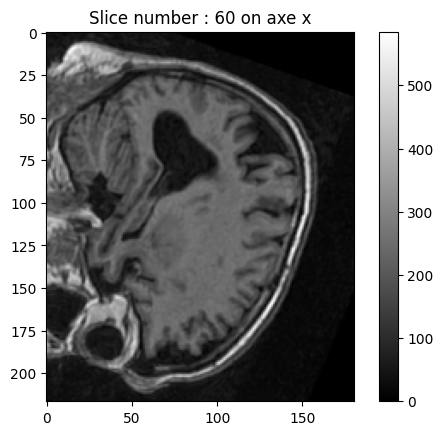

In [4]:
adj = AdjustContrast(1)
im = adj(img.copy())
show_2D(im, 60, "x")

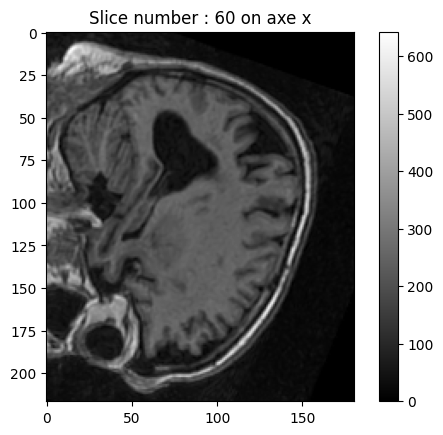

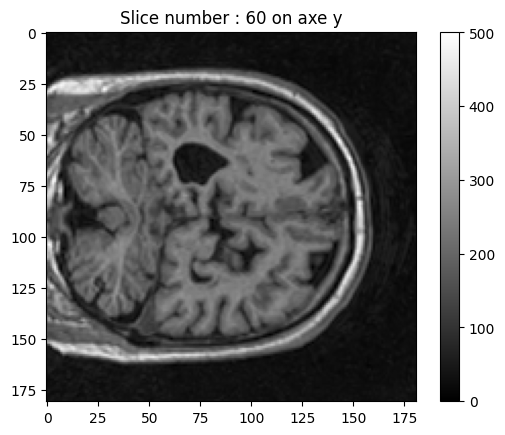

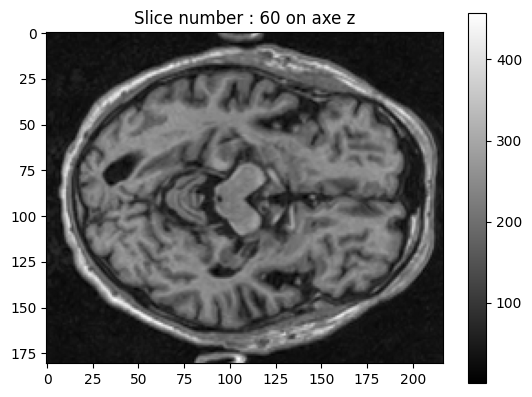

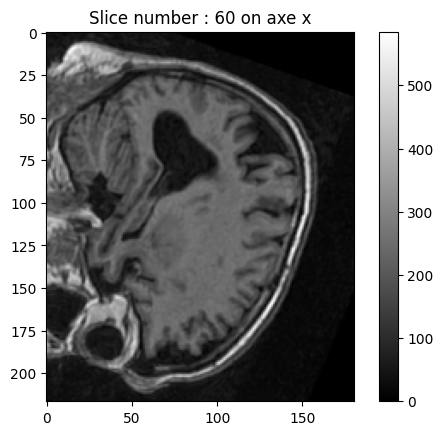

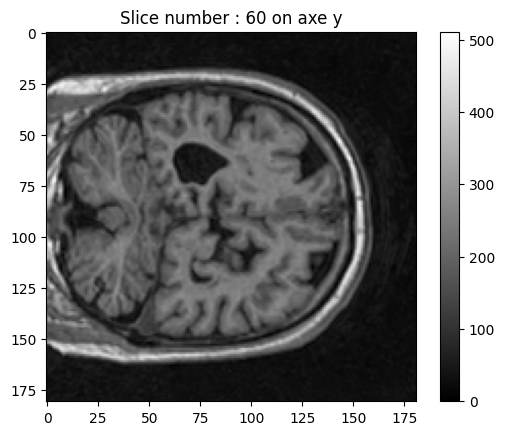

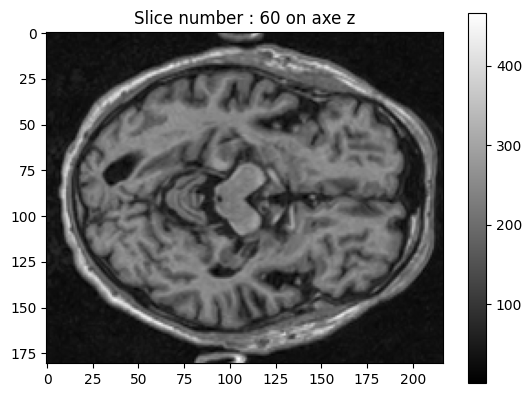

In [5]:
bias = RandBiasField(prob=1)
im = bias(img.copy())
show_2D(im, 60, "x")
show_2D(im, 60, "y")
show_2D(im, 60, "z")
show_2D(img, 60, "x")
show_2D(img, 60, "y")
show_2D(img, 60, "z")

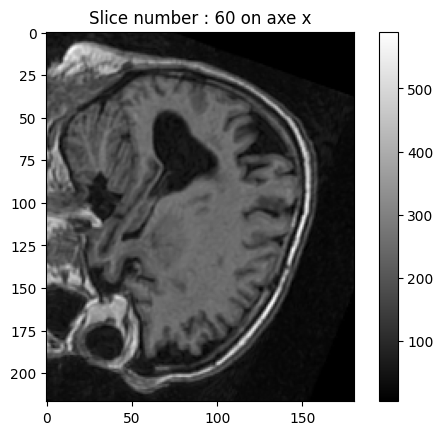

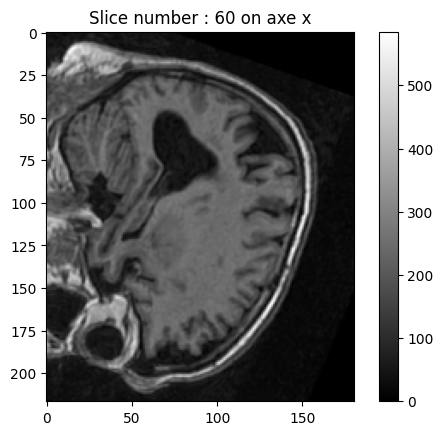

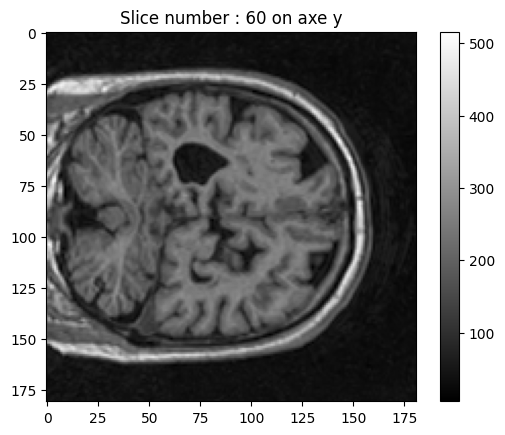

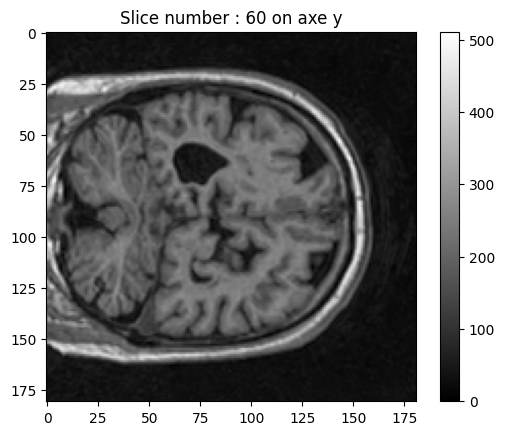

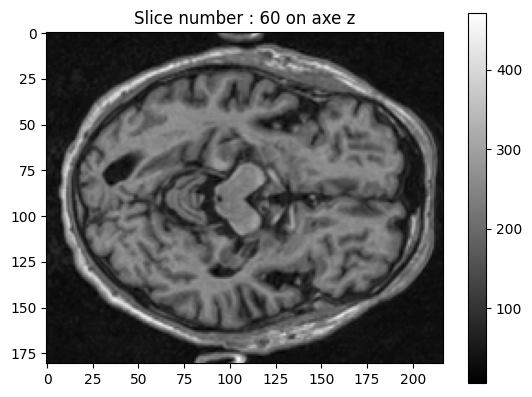

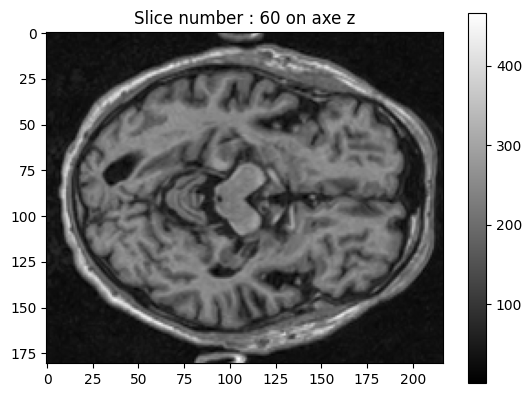

In [6]:
intens = ShiftIntensity(5)

im = intens(img.copy())

show_2D(im, 60, "x")
show_2D(img, 60, "x")
show_2D(im, 60, "y")
show_2D(img, 60, "y")
show_2D(im, 60, "z")
show_2D(img, 60, "z")

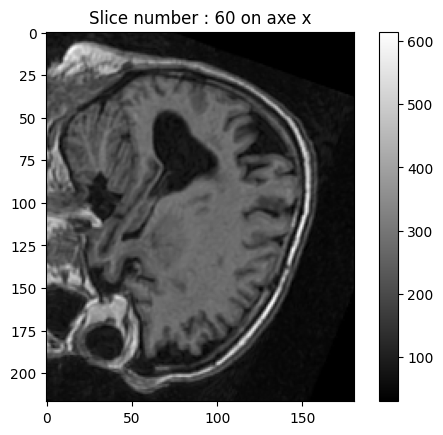

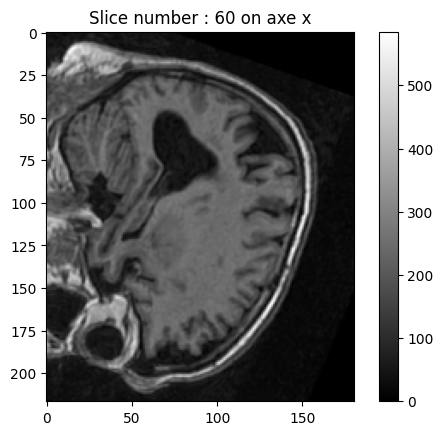

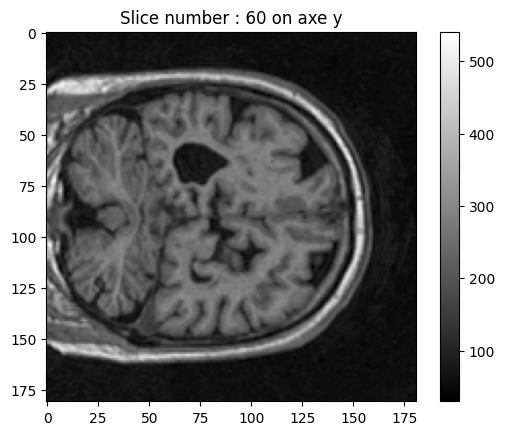

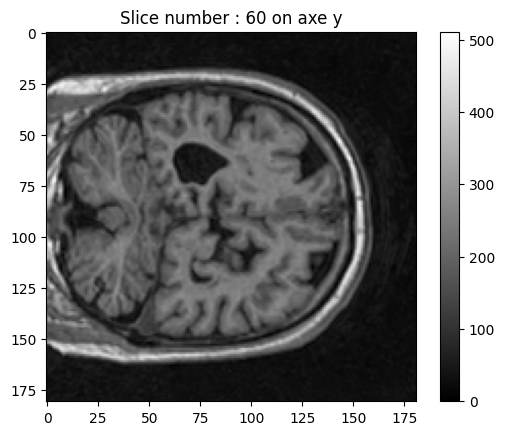

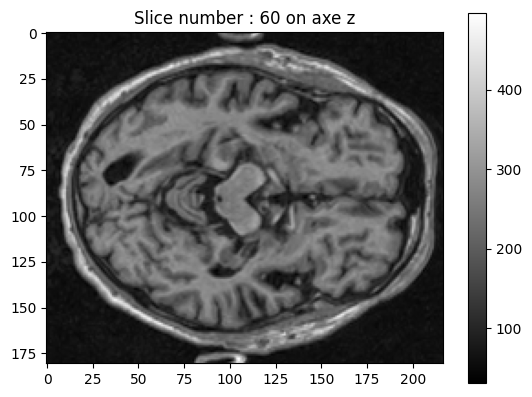

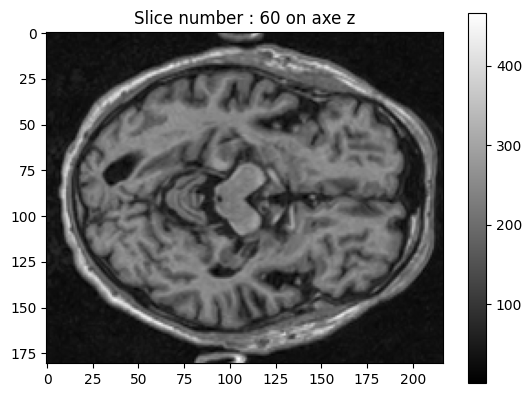

In [7]:
intens = ShiftIntensity(30)

im = intens(img.copy())

show_2D(im, 60, "x")
show_2D(img, 60, "x")
show_2D(im, 60, "y")
show_2D(img, 60, "y")
show_2D(im, 60, "z")
show_2D(img, 60, "z")

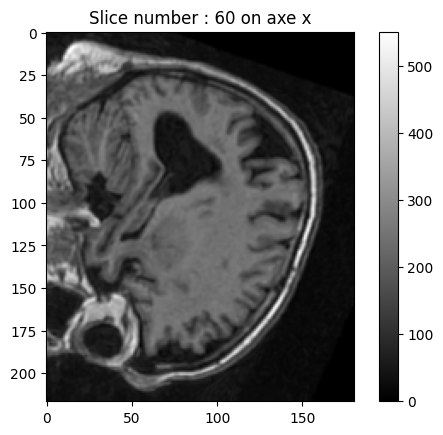

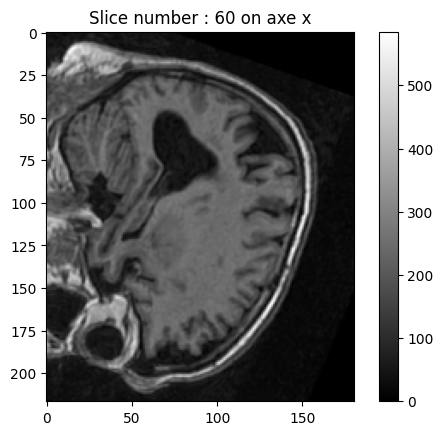

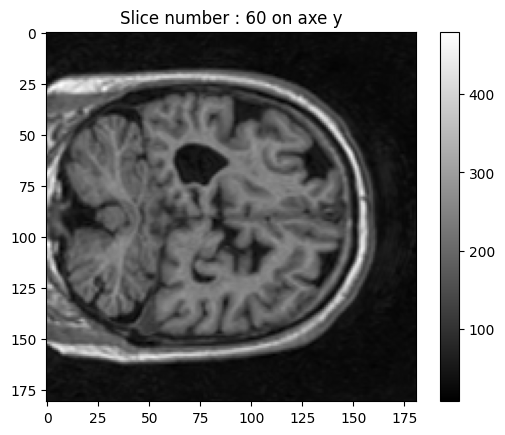

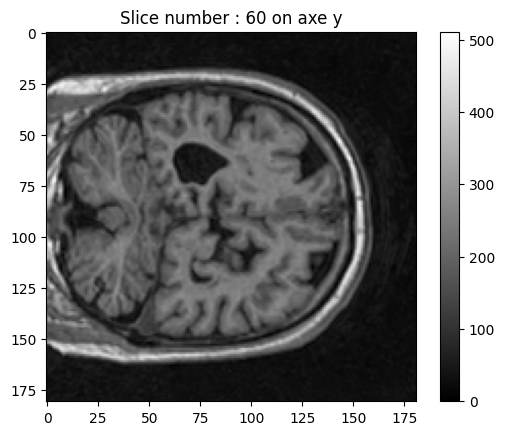

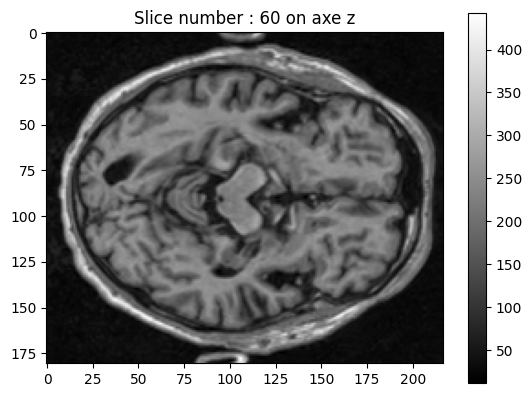

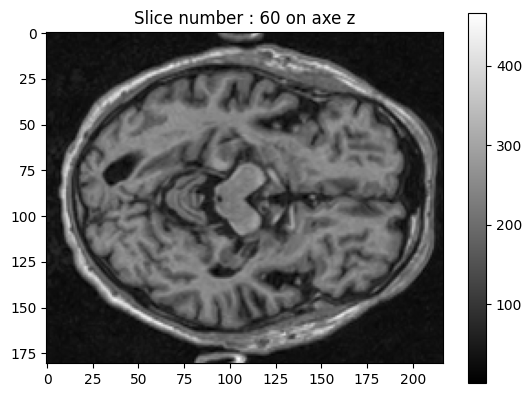

In [8]:
el = Rand3DElastic((50,100),(50,1000), prob=1.0)

im = el(img.copy())

show_2D(im, 60, "x")
show_2D(img, 60, "x")
show_2D(im, 60, "y")
show_2D(img, 60, "y")
show_2D(im, 60, "z")
show_2D(img, 60, "z")